# Molecular Complexity

The `ComplexityFilter` allows to filter a molecule according to its "structural complexity". It's often a good filter to discard compounds that might be challenging to synthetize.

In [1]:
import datamol as dm
import pandas as pd

import medchem as mc

## Available filters

In [15]:
mc.complexity.ComplexityFilter.list_default_available_filters()

['bertz', 'sas', 'qed', 'clogp', 'whitlock', 'barone', 'smcm', 'twc']

In [16]:
mc.complexity.ComplexityFilter.list_default_percentile()

['99', '999', 'max']

In [14]:
mc.complexity.ComplexityFilter.load_threshold_stats_file().head()

,bertz,whitlock,barone,smcm,mw_bins,percentile
0,257.0,14.0,234.0,21.7,150.0,99
1,394.0,17.0,309.0,28.8,200.0,99
2,525.0,20.0,384.0,35.0,250.0,99
3,679.0,23.0,462.0,40.2,300.0,99
4,864.0,26.0,540.0,44.0,350.0,99


## Usage

Load some molecules.

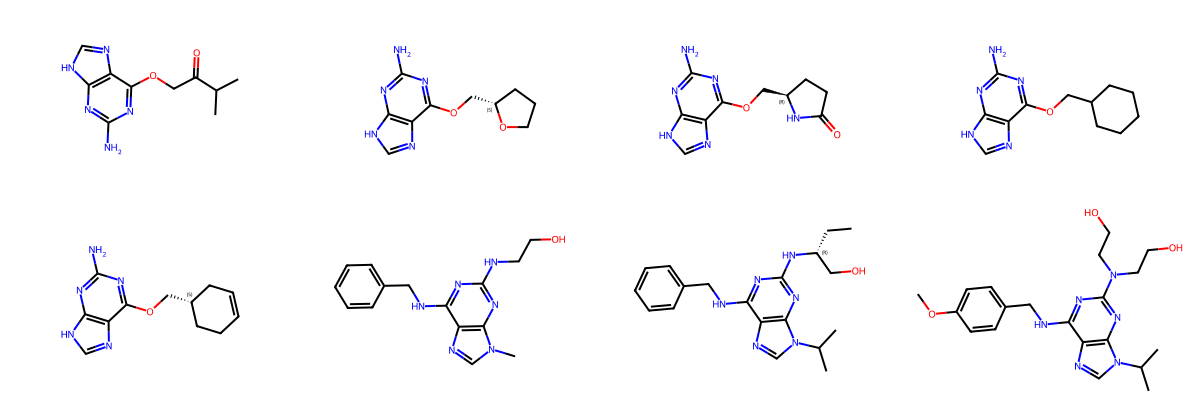

In [27]:
data = dm.data.cdk2()
data = data.iloc[:8]

# Let's remove the conformers since they are not important here.
data["mol"].apply(lambda x: x.RemoveAllConformers())

dm.to_image(data["mol"].tolist(), mol_size=(300, 200))

Load the complexity filter.

In [31]:
cfilter = mc.complexity.ComplexityFilter(threshold_stats_file="zinc_12", complexity_metric="whitlock")

cfilter.complexity_metric

'whitlock'

Apply the filter on our list of molecules. `True` means it passes the filter and `False` mean the molecule is too complex.

In [32]:
data["pass_cfilter"] = data["mol"].apply(cfilter)

data["pass_cfilter"]

0     True
1    False
2    False
3     True
4    False
5     True
6     True
7     True
Name: pass_cfilter, dtype: bool

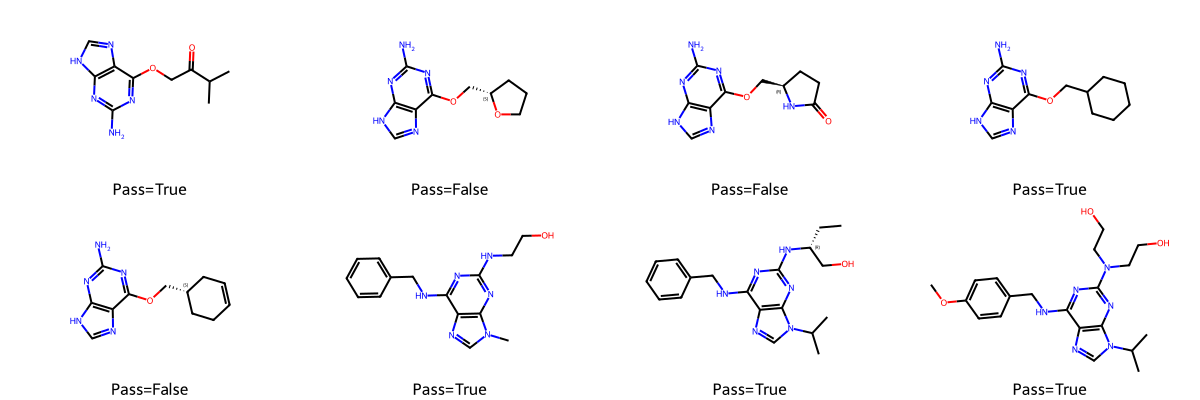

In [35]:
legends = data["pass_cfilter"].apply(lambda x: f"Pass={x}").tolist()

dm.to_image(data["mol"].tolist(), legends=legends, mol_size=(300, 200))